In [106]:
# Projeto de Técnicas de Programação I
import pandas as pd

In [107]:
# Leitura dos dados
df = pd.read_csv('ifood-restaurants-february-2021.csv')
df.head()

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


In [108]:
# Exibe colunas do DataFrame
df.columns

Index(['availableForScheduling', 'avatar', 'category', 'delivery_fee',
       'delivery_time', 'distance', 'ibge', 'minimumOrderValue', 'name',
       'paymentCodes', 'price_range', 'rating', 'tags', 'url'],
      dtype='object')

In [109]:
# Exibe cabeçalho do DataFrame
print("Cabeçalho: ")
df.head()

Cabeçalho: 


,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


In [110]:
# Informações sobre o DataFrame
print("Informações: ")
df.info()

Informações: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: boo

In [111]:
# Estatísticas descritivas do DataFrame
print("Descrição Estatística: ")
df.describe().T

Descrição Estatística: 


,count,mean,std,min,25%,50%,75%,max
delivery_fee,406399.0,6.804577e+00,4.315815,0.0,4.00,6.000000e+00,9.490000e+00,35.00
delivery_time,406399.0,4.743275e+01,19.662736,-1.0,35.00,4.500000e+01,6.000000e+01,5050.00
distance,406399.0,4.219752e+00,68.329379,0.0,1.75,3.080000e+00,4.830000e+00,11810.19
ibge,406399.0,3.441576e+06,752371.056120,1100023.0,3143302.00,3.516408e+06,3.550308e+06,5300108.00
minimumOrderValue,406399.0,2.768909e+02,157066.758573,0.0,10.00,1.500000e+01,2.000000e+01,99999999.99
rating,406399.0,2.522241e+00,2.286103,0.0,0.00,3.958900e+00,4.718750e+00,5.00


In [112]:
# Transforma variáveis string em números, para que possam ser manipuladas
# Float para valores, int para minutos, int para kilômetros

df.fillna(0, inplace=True)

df['delivery_fee'] = df['delivery_fee'].replace('[\\$,]', '', regex=True).astype(float)
df['minimumOrderValue'] = df['minimumOrderValue'].replace('[\\$,]', '', regex=True).astype(float)

df['distance'] = df['distance'].astype(int)
df['delivery_time'] = df['delivery_time'].astype(int)

# Exibe transformação
df.head()

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406399 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int32  
 5   distance                406399 non-null  int32  
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406399 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool(1), float64(

In [114]:
# Normalização de strings e categorização
# df['category'] = df['category'].astype('category')  -- Têm que ser object mesmo

df['name'] = df['name'].str.lower()

mean_rating_by_category = df.groupby('category')['rating'].mean()

df.drop_duplicates(inplace=True)

In [115]:
# Soma a quantidade de valores nulos
nulos_category = df['category'].isnull().sum()
nulos_name = df['name'].isnull().sum()
nulos_paymentCodes = df['paymentCodes'].isnull().sum()
nulos_tags = df['tags'].isnull().sum()
nulos_url = df['url'].isnull().sum()

# Imprime a quantidade de valores nulos
print(f'Category: {nulos_category} nulos')
print(f'Name: {nulos_name} nulos')
print(f'PaymentCodes: {nulos_paymentCodes} nulos')
print(f'Tags: {nulos_tags} nulos')
print(f'URL: {nulos_url} nulos')

Category: 0 nulos
Name: 0 nulos
PaymentCodes: 0 nulos
Tags: 0 nulos
URL: 0 nulos


In [116]:
# Confere URL e verifica cidades e estados
# Itera sobre todas as linhas do DataFrame
# Adiciona informações em um novo DataFrame
df['Cidade_Estado'] = ''

for index, row in df.iterrows():
    url = row['url']
    df.at[index, 'Cidade_Estado'] = url[34:].split('/')[0]

print(df['Cidade_Estado'])

0             brasilia-df
1             brasilia-df
2             brasilia-df
3             brasilia-df
4             brasilia-df
               ...       
406394        gravatai-rs
406395    cachoeirinha-rs
406396        gravatai-rs
406397        gravatai-rs
406398    cachoeirinha-rs
Name: Cidade_Estado, Length: 406399, dtype: object


In [117]:
# Inserir informações extraídas da URL no DataFrame
df['base_url'] = df['url'].apply(lambda x: x.split("/delivery/")[0] if pd.notna(x) else None)
df['location'] = df['url'].apply(lambda x: x.split("/delivery/")[1].split("/")[0] if pd.notna(x) else None)
df['restaurant_name'] = df['url'].apply(lambda x: x.split("/delivery/")[1].split("/")[1] if pd.notna(x) else None)
df['restaurant_id'] = df['url'].apply(lambda x: x.split("/delivery/")[1].split("/")[2] if pd.notna(x) else None)

df.head()

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url,Cidade_Estado,base_url,location,restaurant_name,restaurant_id
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1,5300108,10.0,cantina arte & sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,cantina-arte--sabor-parque-ferroviario-de-bras...,136c9a0c-02fb-4cf6-90b6-c4e89bd43c5b
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4,5300108,10.0,raruty açaí raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,raruty-acai-raiz-asa-norte,5608d2c8-91b8-4bad-b905-63ed030b5797
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8,5300108,5.0,toma na kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,toma-na-kombi-lago-norte,33bf98af-fbbc-4ea8-9fe6-086f5a2db064
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6,5300108,20.0,churrasquinho do barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,churrasquinho-do-barrigas-asa-sul,10d4b6c4-3481-42f4-a1f6-204acc437db5
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5,5300108,20.0,prime restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,prime-restaurante-asa-sul,16e90495-f316-4f64-b5a7-d325f4bc2177


In [ ]:
# Retirando valores acima de 10000 na coluna minimumOrderValue, por ser muito fora da curva
df = df.loc[df["minimumOrderValue"] < 10000]

In [76]:
#df["category"].value_counts()
contagem = df.groupby("category").size().reset_index(name='contagem').sort_values("contagem", ascending=False)


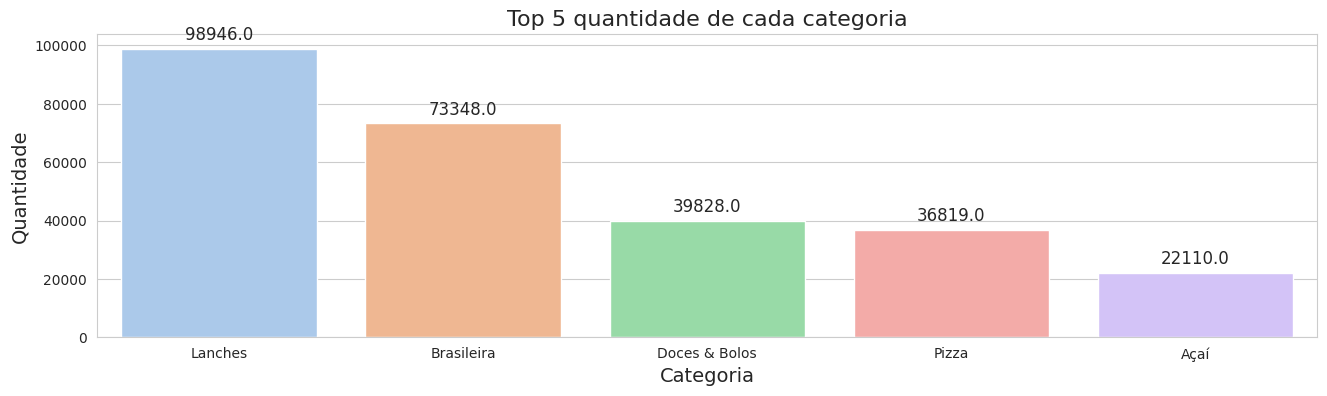

In [99]:
import seaborn as sns
with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=contagem.head(5), x="category", y="contagem", hue="category", palette="pastel")
    for p in grafico.patches:
        grafico.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    grafico.set_title('Top 5 quantidade de cada categoria', fontsize=16)
    grafico.set_xlabel('Categoria', fontsize=14)
    grafico.set_ylabel('Quantidade', fontsize=14)
    grafico.figure.set_size_inches(w=40/2.54, h=10/2.54);

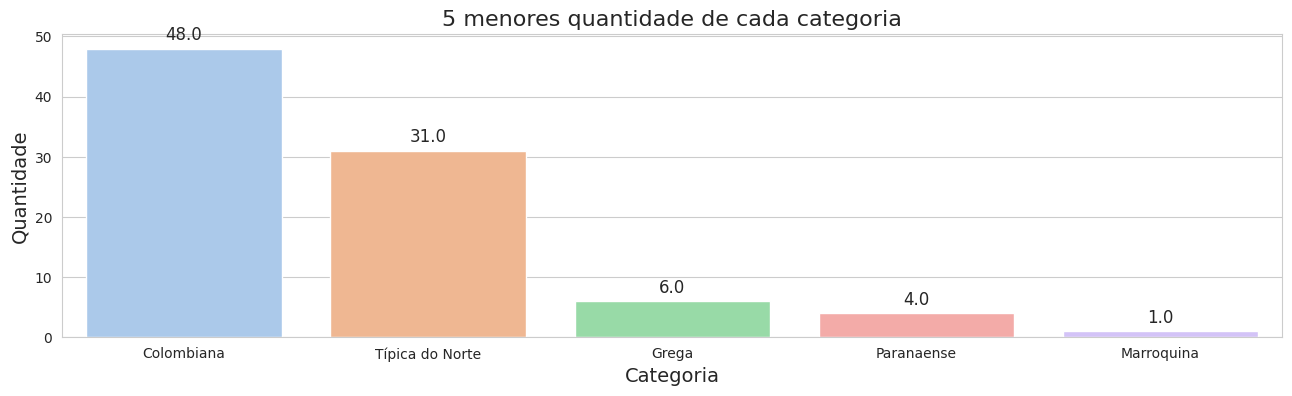

In [100]:
with sns.axes_style('whitegrid'):

    grafico = sns.barplot(data=contagem.tail(5), x="category", y="contagem", hue="category", palette="pastel")
    for p in grafico.patches:
        grafico.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    grafico.set_title('5 menores quantidade de cada categoria', fontsize=16)
    grafico.set_xlabel('Categoria', fontsize=14)
    grafico.set_ylabel('Quantidade', fontsize=14)
    grafico.figure.set_size_inches(w=40/2.54, h=10/2.54);

In [120]:
df.head()

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url,Cidade_Estado,base_url,location,restaurant_name,restaurant_id
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1,5300108,10.0,cantina arte & sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,cantina-arte--sabor-parque-ferroviario-de-bras...,136c9a0c-02fb-4cf6-90b6-c4e89bd43c5b
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4,5300108,10.0,raruty açaí raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,raruty-acai-raiz-asa-norte,5608d2c8-91b8-4bad-b905-63ed030b5797
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8,5300108,5.0,toma na kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,toma-na-kombi-lago-norte,33bf98af-fbbc-4ea8-9fe6-086f5a2db064
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6,5300108,20.0,churrasquinho do barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,churrasquinho-do-barrigas-asa-sul,10d4b6c4-3481-42f4-a1f6-204acc437db5
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5,5300108,20.0,prime restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...,brasilia-df,https://www.ifood.com.br,brasilia-df,prime-restaurante-asa-sul,16e90495-f316-4f64-b5a7-d325f4bc2177


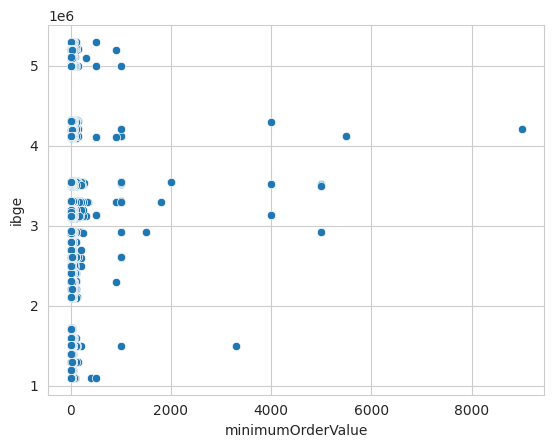

In [134]:
with sns.axes_style("whitegrid"):
    grafico = sns.scatterplot(data=df, x="minimumOrderValue", y="ibge")

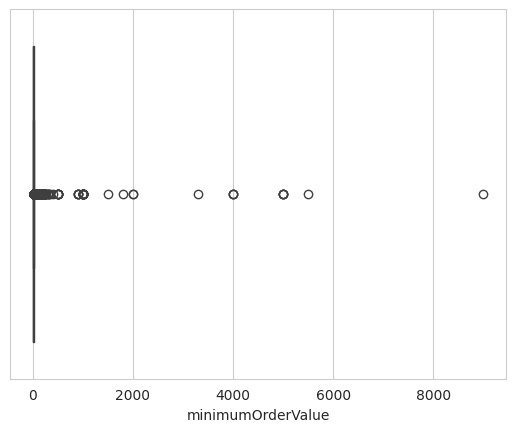

In [133]:
with sns.axes_style("whitegrid"):
    grafico = sns.boxplot(x=df["minimumOrderValue"])

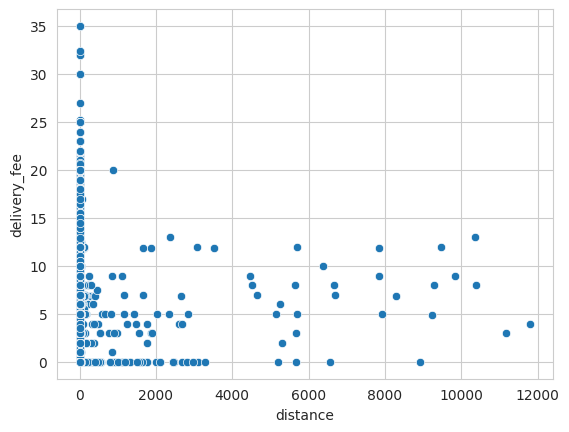

In [140]:
with sns.axes_style("whitegrid"):
    grafico = sns.scatterplot(data=df, x="distance", y="delivery_fee")

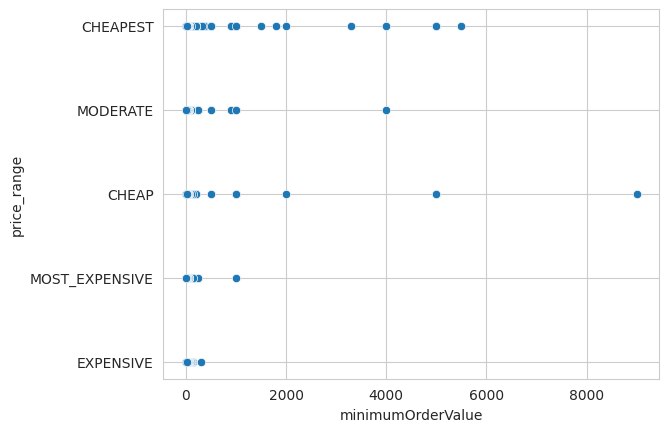

In [142]:
with sns.axes_style("whitegrid"):
    grafico = sns.scatterplot(data=df, x="minimumOrderValue", y="price_range")

In [144]:
df.columns

Index(['availableForScheduling', 'avatar', 'category', 'delivery_fee',
       'delivery_time', 'distance', 'ibge', 'minimumOrderValue', 'name',
       'paymentCodes', 'price_range', 'rating', 'tags', 'url', 'Cidade_Estado',
       'base_url', 'location', 'restaurant_name', 'restaurant_id'],
      dtype='object')

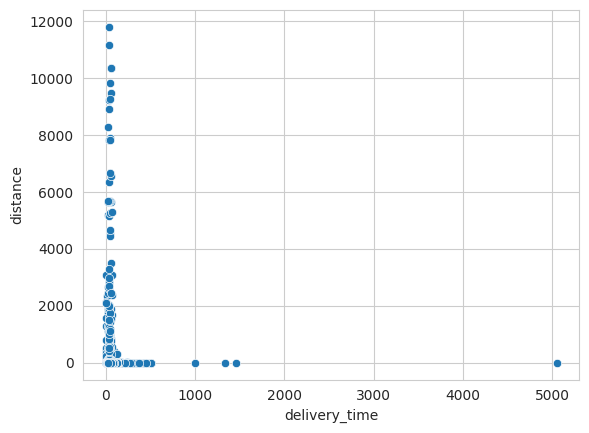

In [145]:
with sns.axes_style("whitegrid"):
    grafico = sns.scatterplot(data=df, x="delivery_time", y="distance")

In [132]:
df = df.loc[df["minimumOrderValue"] < 10000]

In [141]:
df["price_range"].unique()

array(['CHEAPEST', 'MODERATE', 'CHEAP', 'MOST_EXPENSIVE', 'EXPENSIVE'],
      dtype=object)